This file analyses our algorithm's performance under different choices of subproblem size $d$.

In [2]:
import numpy as np
import pickle

def save_data(data_list, filename='qubo_data.pkl'):
    with open(filename, 'wb') as f:
        # Serializing the data list using pickle
        pickle.dump(data_list, f)

def load_data(filename='qubo_data.pkl'):
    with open(filename, 'rb') as f:
        # Deserializing the data from the file
        data_list = pickle.load(f)
    return data_list

method2label = {'impact':'impact-indexing','cluster':'cluster','pool':'degree-of-certainty'}

## 3-regular graph

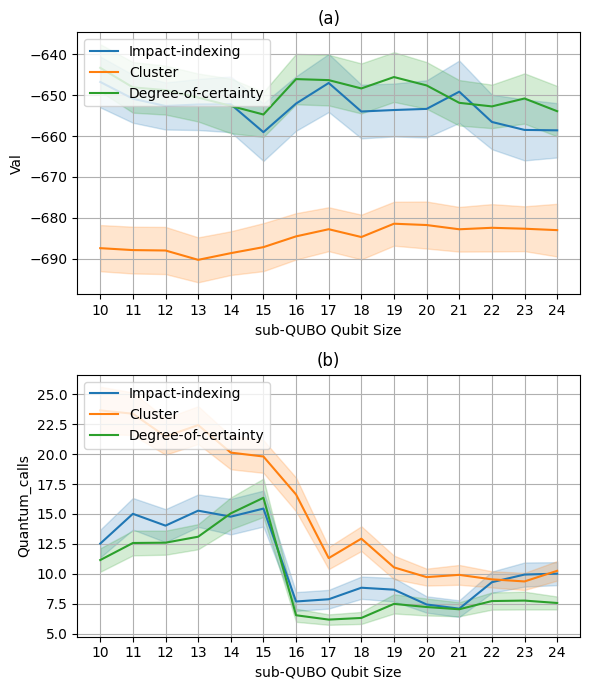

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Load data from both files
data_list = load_data('../data/100Node3Regular_d_data.pkl')
# data_list_large = load_data('100Nodes3Regular_d_data_large_qubit_size.pkl')

# Concatenate data lists
# data_list = data_list_small + data_list_large

# Set the full range of qubit sizes and other parameters
qubit_sizes = range(10, 25)  # From smallest in data_list_small to largest in data_list_large
metrics = ['val', 'quantum_calls', 'total_iters']
# method_names = ['impact', 'cluster', 'cluster_coreg', 'random', 'pool']
method_names = ['impact', 'cluster', 'pool']

# Create a dictionary to hold the data for plotting
plot_data = {metric: {method: {qubit_size: [] for qubit_size in qubit_sizes} for method in method_names} for metric in metrics}

# Fill the dictionary with data
for entry in data_list:
    for qubit_size in qubit_sizes:
        for metric in metrics:
            for method in method_names:
                if qubit_size in entry[f'results_{method}']:
                    plot_data[metric][method][qubit_size].append(entry[f'results_{method}'][qubit_size][metric])

def create_subplot(metric, plot_data, subplot_index, ax):
    qubit_sizes_array = np.array(list(qubit_sizes))

    for method_index, method in enumerate(method_names):
        means = [np.mean(plot_data[metric][method][qs]) if plot_data[metric][method][qs] else np.nan for qs in qubit_sizes]
        stds = [np.std(plot_data[metric][method][qs]) if plot_data[metric][method][qs] else np.nan for qs in qubit_sizes]
        sems = [stds[i] / np.sqrt(len(plot_data[metric][method][qs])) if plot_data[metric][method][qs] else np.nan for i, qs in enumerate(qubit_sizes)]

        ax.plot(qubit_sizes_array, means, label=method2label[method].capitalize(), color=f'C{method_index}')
        ax.fill_between(qubit_sizes_array, np.array(means) - 1.96 * np.array(sems), np.array(means) + 1.96 * np.array(sems), color=f'C{method_index}', alpha=0.2)

    ax.set_title('('+f'{chr(96 + subplot_index)}'+')')
    ax.set_xlabel('sub-QUBO Qubit Size')
    ax.set_ylabel(metric.capitalize())
    ax.set_xticks(list(qubit_sizes))
    ax.legend(loc='upper left')
    ax.grid(True)

# Create figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(6, 7))  # Create 2 subplots vertically
create_subplot('val', plot_data, 1, axs[0])
create_subplot('quantum_calls', plot_data, 2, axs[1])
plt.tight_layout()
plt.savefig('../fig/3regular_d_data.pdf')

讨论为什么performance会根据qubit size跳变
1. 取qubit-size=10，15，20，实验画一个迭代次数-函数值的图
2. 画一个（qubit-size）--（分组数量）的图

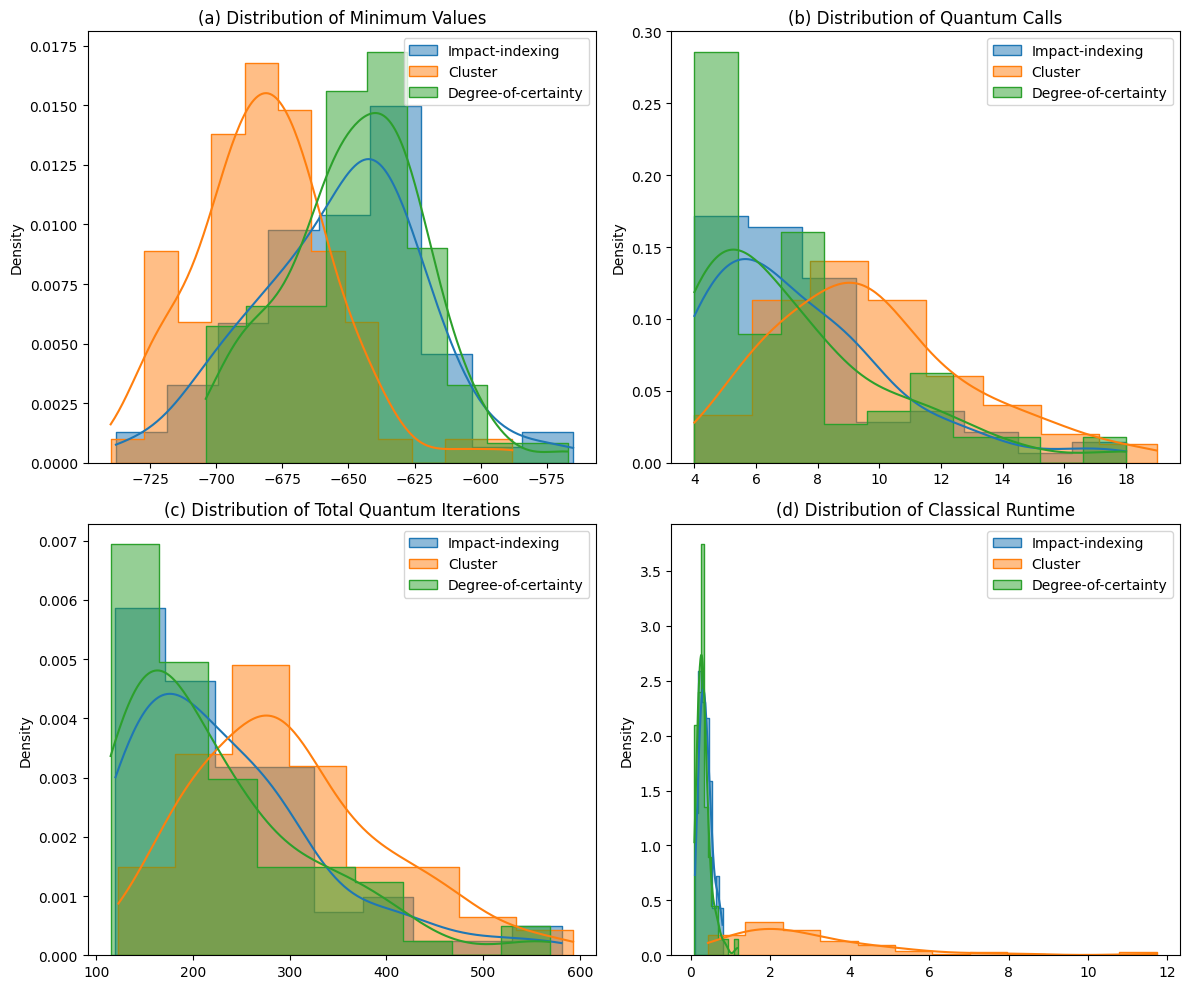

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

def load_data(file_name):
    with open(file_name, 'rb') as file:
        return pickle.load(file)

data_list = load_data('../data/100Node3Regular_d_data.pkl')

for datum in data_list:
    datum['res_impact'] = datum['results_impact'][20]
    datum['res_cluster'] = datum['results_cluster'][20]
    datum['res_pool'] = datum['results_pool'][20]

# Initialize data dictionaries
data_dict = {
    'impact': {'vals': [], 'quantum_calls': [], 'total_iters': [], 'classical_runtime': []},
    'cluster': {'vals': [], 'quantum_calls': [], 'total_iters': [], 'classical_runtime': []},
    'pool': {'vals': [], 'quantum_calls': [], 'total_iters': [], 'classical_runtime': []},
}

# Fill data dictionaries
for method in data_dict.keys():
    for entry in data_list:
        data_dict[method]['vals'].append(entry[f'res_{method}']['val'])
        data_dict[method]['quantum_calls'].append(entry[f'res_{method}']['quantum_calls'])
        data_dict[method]['total_iters'].append(entry[f'res_{method}']['total_iters'])
        data_dict[method]['classical_runtime'].append(entry[f'res_{method}']['classical_runtime'])

# Plot settings
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
titles = ['(a) Distribution of Minimum Values', '(b) Distribution of Quantum Calls', 
          '(c) Distribution of Total Quantum Iterations', '(d) Distribution of Classical Runtime']
metrics = ['vals', 'quantum_calls', 'total_iters', 'classical_runtime']

# Plot histograms
for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)
    for method in data_dict.keys():
        sns.histplot(data_dict[method][metric], kde=True, label=method2label[method].capitalize(), 
                     element='step', stat='density', alpha=0.5, ax=axes[row, col])
    axes[row, col].legend()
    axes[row, col].set_title(titles[i])

plt.tight_layout()
plt.savefig('../fig/3regular_detail.pdf')


## Erdős–Rényi graph

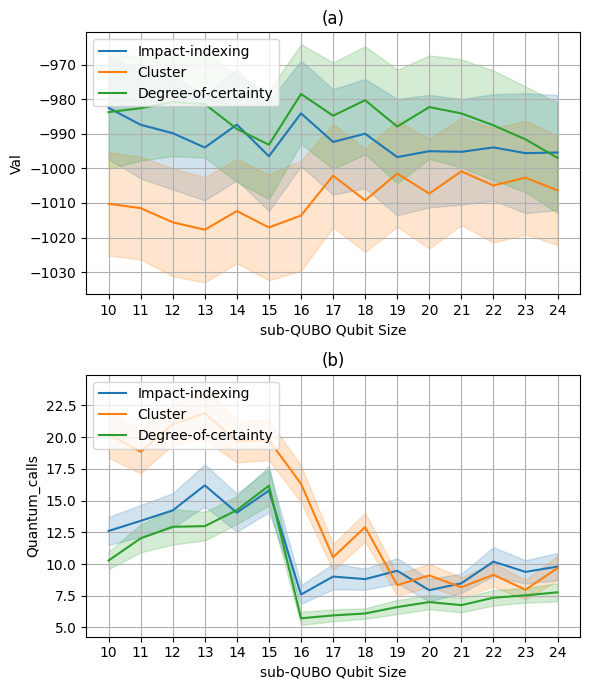

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Load data from both files
data_list = load_data('../data/100er_d_data.pkl')
# data_list_large = load_data('100Nodes3Regular_d_data_large_qubit_size.pkl')

# Concatenate data lists
# data_list = data_list_small + data_list_large

# Set the full range of qubit sizes and other parameters
qubit_sizes = range(10, 25)  # From smallest in data_list_small to largest in data_list_large
metrics = ['val', 'quantum_calls', 'total_iters']
# method_names = ['impact', 'cluster', 'cluster_coreg', 'random', 'pool']
method_names = ['impact', 'cluster', 'pool']

# Create a dictionary to hold the data for plotting
plot_data = {metric: {method: {qubit_size: [] for qubit_size in qubit_sizes} for method in method_names} for metric in metrics}

# Fill the dictionary with data
for entry in data_list:
    for qubit_size in qubit_sizes:
        for metric in metrics:
            for method in method_names:
                if qubit_size in entry[f'results_{method}']:
                    plot_data[metric][method][qubit_size].append(entry[f'results_{method}'][qubit_size][metric])

def create_subplot(metric, plot_data, subplot_index, ax):
    qubit_sizes_array = np.array(list(qubit_sizes))

    for method_index, method in enumerate(method_names):
        means = [np.mean(plot_data[metric][method][qs]) if plot_data[metric][method][qs] else np.nan for qs in qubit_sizes]
        stds = [np.std(plot_data[metric][method][qs]) if plot_data[metric][method][qs] else np.nan for qs in qubit_sizes]
        sems = [stds[i] / np.sqrt(len(plot_data[metric][method][qs])) if plot_data[metric][method][qs] else np.nan for i, qs in enumerate(qubit_sizes)]

        ax.plot(qubit_sizes_array, means, label=method2label[method].capitalize(), color=f'C{method_index}')
        ax.fill_between(qubit_sizes_array, np.array(means) - 1.96 * np.array(sems), np.array(means) + 1.96 * np.array(sems), color=f'C{method_index}', alpha=0.2)

    ax.set_title('('+f'{chr(96 + subplot_index)}'+')')
    ax.set_xlabel('sub-QUBO Qubit Size')
    ax.set_ylabel(metric.capitalize())
    ax.set_xticks(list(qubit_sizes))
    ax.legend(loc='upper left')
    ax.grid(True)

# Create figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(6, 7))  # Create 2 subplots vertically
create_subplot('val', plot_data, 1, axs[0])
create_subplot('quantum_calls', plot_data, 2, axs[1])
plt.tight_layout()
plt.savefig('../fig/er_d_data.pdf')

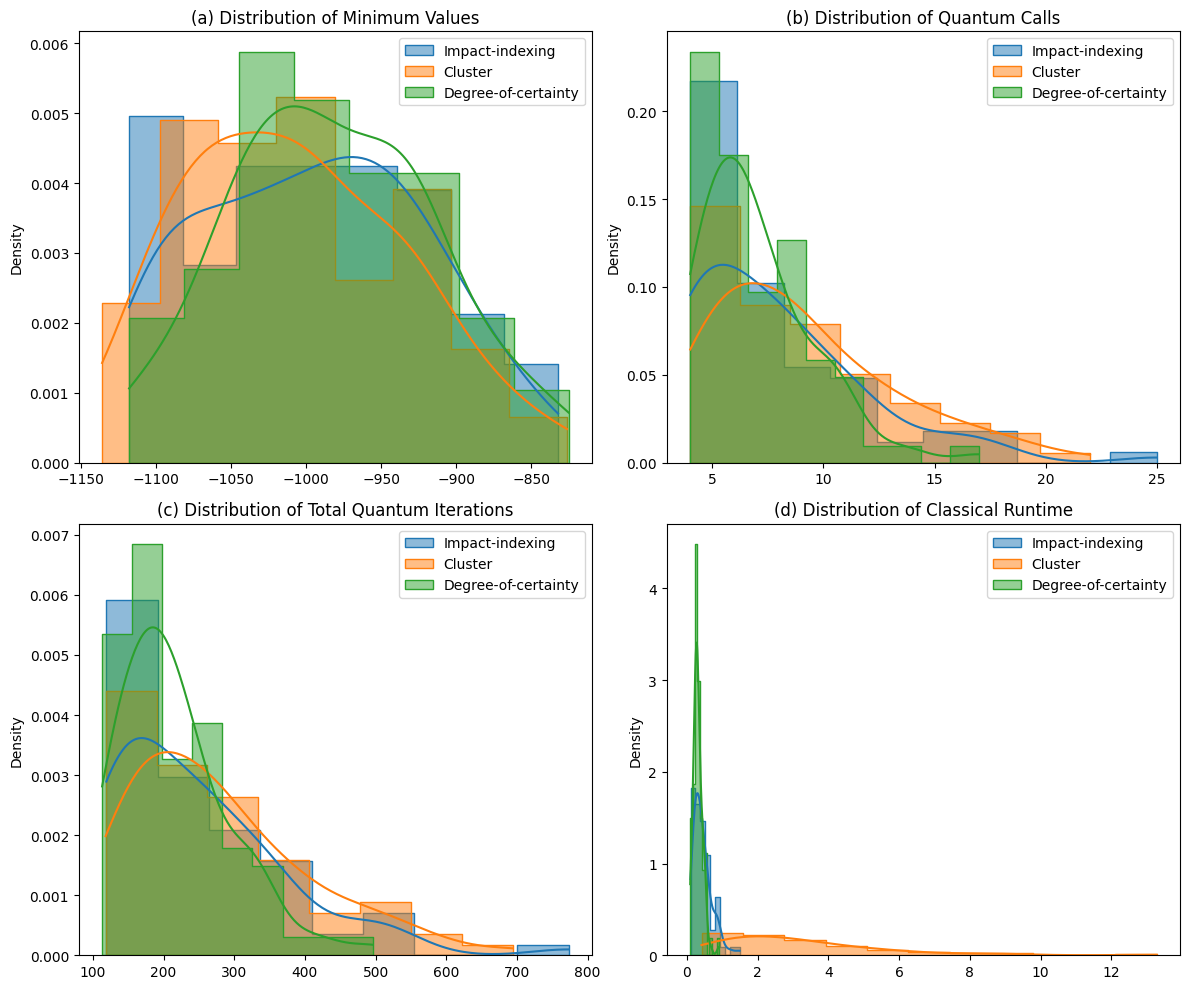

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

data_list = load_data('../data/100er_d_data.pkl')

for datum in data_list:
    datum['res_impact'] = datum['results_impact'][20]
    datum['res_cluster'] = datum['results_cluster'][20]
    datum['res_pool'] = datum['results_pool'][20]

# Initialize data dictionaries
data_dict = {
    'impact': {'vals': [], 'quantum_calls': [], 'total_iters': [], 'classical_runtime': []},
    'cluster': {'vals': [], 'quantum_calls': [], 'total_iters': [], 'classical_runtime': []},
    'pool': {'vals': [], 'quantum_calls': [], 'total_iters': [], 'classical_runtime': []},
}

# Fill data dictionaries
for method in data_dict.keys():
    for entry in data_list:
        data_dict[method]['vals'].append(entry[f'res_{method}']['val'])
        data_dict[method]['quantum_calls'].append(entry[f'res_{method}']['quantum_calls'])
        data_dict[method]['total_iters'].append(entry[f'res_{method}']['total_iters'])
        data_dict[method]['classical_runtime'].append(entry[f'res_{method}']['classical_runtime'])

# Plot settings
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
titles = ['(a) Distribution of Minimum Values', '(b) Distribution of Quantum Calls', 
          '(c) Distribution of Total Quantum Iterations', '(d) Distribution of Classical Runtime']
metrics = ['vals', 'quantum_calls', 'total_iters', 'classical_runtime']

# Plot histograms
for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)
    for method in data_dict.keys():
        sns.histplot(data_dict[method][metric], kde=True, label=method2label[method].capitalize(), 
                     element='step', stat='density', alpha=0.5, ax=axes[row, col])
    axes[row, col].legend()
    axes[row, col].set_title(titles[i])

plt.tight_layout()
plt.savefig('../fig/er_detail.pdf')

## regular graph + tabu search

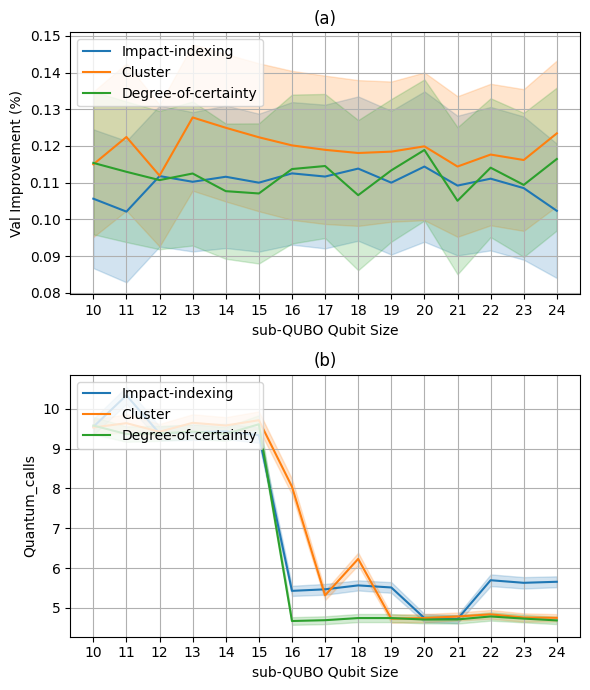

In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)
    
# Load data from the file
data_list = load_data('../data/100Node3Regular_d_data_tabu.pkl')

# Set the full range of qubit sizes and other parameters
qubit_sizes = range(10, 25)
metrics = ['val', 'quantum_calls', 'total_iters']
method_names = ['impact', 'cluster', 'pool']

# Create a dictionary to hold the data for plotting
plot_data = {metric: {method: {qubit_size: [] for qubit_size in qubit_sizes} for method in method_names} for metric in metrics}

# Fill the dictionary with data
tabu_values = []
for entry in data_list:
    tabu_val = entry['result_tabu'][1]
    for qubit_size in qubit_sizes:
        for metric in metrics:
            for method in method_names:
                if qubit_size in entry['results_' + method]:
                    if metric == 'val':
                        plot_data[metric][method][qubit_size].append((entry['results_' + method][qubit_size][metric] - tabu_val) / tabu_val * 100)
                    else:
                        plot_data[metric][method][qubit_size].append(entry['results_' + method][qubit_size][metric])
    tabu_values.append(tabu_val)

def create_subplot(metric, plot_data, subplot_index, ax):
    qubit_sizes_array = np.array(list(qubit_sizes))
    colors = ['C0', 'C1', 'C2']
    for i, method in enumerate(method_names):
        # Calculate mean and standard error
        means = [np.mean(plot_data[metric][method][qs]) if plot_data[metric][method][qs] else np.nan for qs in qubit_sizes]
        stds = [np.std(plot_data[metric][method][qs]) if plot_data[metric][method][qs] else np.nan for qs in qubit_sizes]
        sems = [stds[j] / np.sqrt(len(plot_data[metric][method][qs])) if plot_data[metric][method][qs] else np.nan for j, qs in enumerate(qubit_sizes)]
        
        # Plot with confidence intervals
        ax.plot(qubit_sizes_array, means, label=method2label[method].capitalize(), color=colors[i])
        ax.fill_between(qubit_sizes_array, np.array(means) - 1.96 * np.array(sems), np.array(means) + 1.96 * np.array(sems), color=colors[i], alpha=0.2)

    ax.set_title('('+f'{chr(96 + subplot_index)}'+')')
    ax.set_xlabel('sub-QUBO Qubit Size')
    ax.set_ylabel('Val Improvement (%)' if metric == 'val' else metric.capitalize())
    ax.set_xticks(list(qubit_sizes))
    ax.legend(loc='upper left')
    ax.grid(True)

# Create figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(6, 7))  # Create 2 subplots vertically
create_subplot('val', plot_data, 1, axs[0])
create_subplot('quantum_calls', plot_data, 2, axs[1])

plt.tight_layout()
plt.savefig('../fig/tabu.pdf')



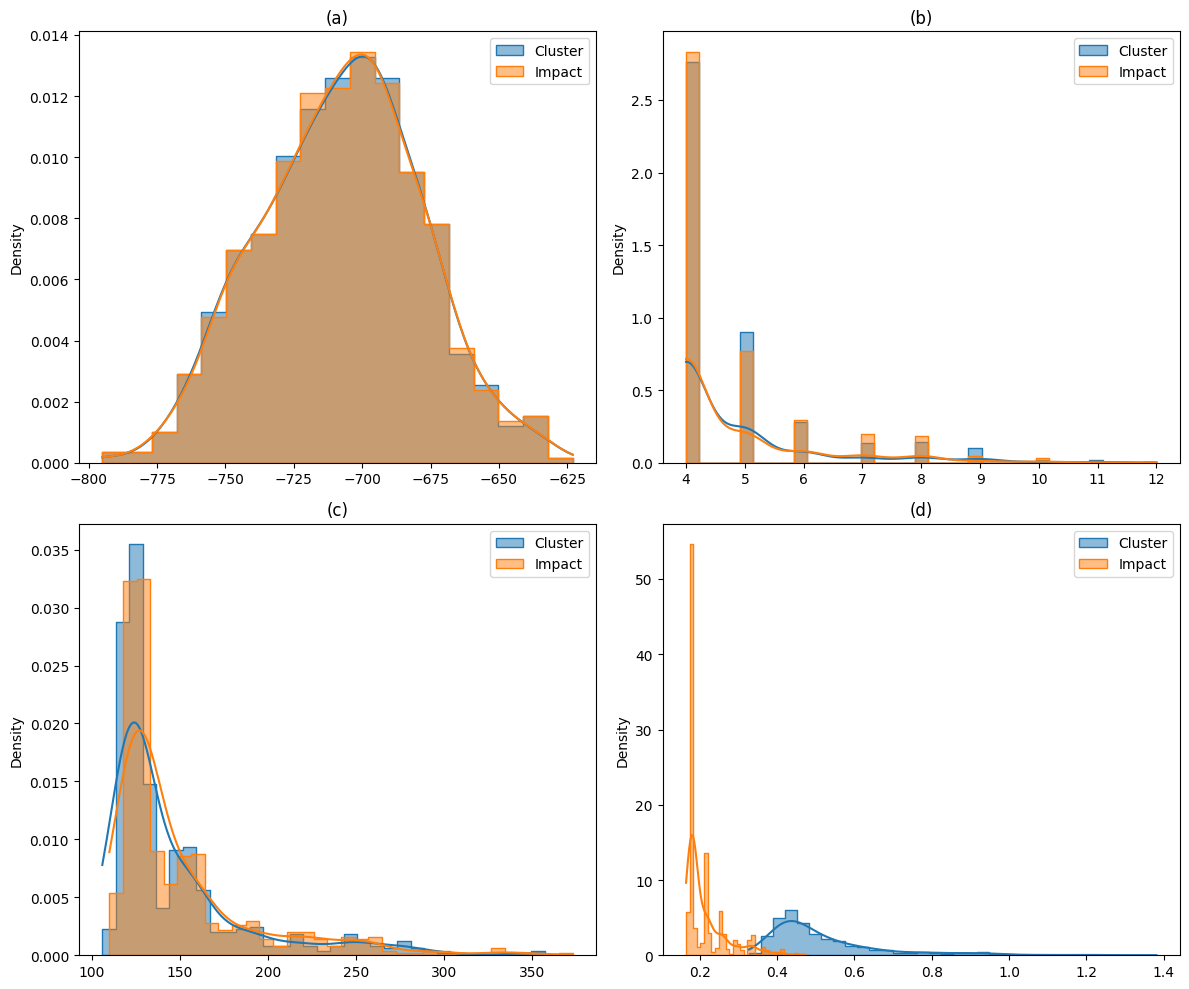

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

data_list = load_data('../data/100Node3Regular_d_data_tabu.pkl')

for datum in data_list:
    datum['res_impact'] = datum['results_impact'][20]
    datum['res_cluster'] = datum['results_cluster'][20]

# 初始化数据列表
vals_impact = [entry['res_impact']['val'] for entry in data_list]
vals_cluster = [entry['res_cluster']['val'] for entry in data_list]

quantum_calls_impact = [entry['res_impact']['quantum_calls'] for entry in data_list]
quantum_calls_cluster = [entry['res_cluster']['quantum_calls'] for entry in data_list]

total_iters_impact = [entry['res_impact']['total_iters'] for entry in data_list]
total_iters_cluster = [entry['res_cluster']['total_iters'] for entry in data_list]

classical_runtime_impact = [entry['res_impact']['classical_runtime'] for entry in data_list]
classical_runtime_cluster = [entry['res_cluster']['classical_runtime'] for entry in data_list]

# 创建 2x2 的图表布局
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 最小值分布图
sns.histplot(vals_cluster, kde=True, label='Cluster', element='step', stat='density', alpha=0.5, ax=axes[0, 0])
sns.histplot(vals_impact, kde=True, label='Impact', element='step', stat='density', alpha=0.5, ax=axes[0, 0])
axes[0, 0].legend()
axes[0, 0].set_title('(a) Distribution of Minimum Values')
axes[0, 0].set_title('(a)')

# 量子进程调用数分布图
sns.histplot(quantum_calls_cluster, kde=True, label='Cluster', element='step', stat='density', alpha=0.5, ax=axes[0, 1])
sns.histplot(quantum_calls_impact, kde=True, label='Impact', element='step', stat='density', alpha=0.5, ax=axes[0, 1])
axes[0, 1].legend()
axes[0, 1].set_title('(b) Distribution of Quantum Calls')
axes[0, 1].set_title('(b)')

# 量子优化次数分布图
sns.histplot(total_iters_cluster, kde=True, label='Cluster', element='step', stat='density', alpha=0.5, ax=axes[1, 0])
sns.histplot(total_iters_impact, kde=True, label='Impact', element='step', stat='density', alpha=0.5, ax=axes[1, 0])
axes[1, 0].legend()
axes[1, 0].set_title('(c) Distribution of Total Quantum Iterations')
axes[1, 0].set_title('(c)')

# 经典运行时间分布图
sns.histplot(classical_runtime_cluster, kde=True, label='Cluster', element='step', stat='density', alpha=0.5, ax=axes[1, 1])
sns.histplot(classical_runtime_impact, kde=True, label='Impact', element='step', stat='density', alpha=0.5, ax=axes[1, 1])
axes[1, 1].legend()
axes[1, 1].set_title('(d) Distribution of Classical Runtime')
axes[1, 1].set_title('(d)')

plt.tight_layout()
plt.show()
# 这个图无效，因为采用了tabu search求解子问题，缺失了量子优化次数这一指标，

1. 在正文中说，我们用贪心算法作为经典算法的例子，在文献中，大家也采用了其他的算法（禁忌搜索）作为经典部分，我们在附录中也作了比较
2. 在tabu search的数据中，尝试增加试验次数，减少置信区间，让两者能分开